# IO

In [1]:
from PineBioML import IO

In [2]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_basic "

In [3]:
##### Read data method 1: read single file
##### index_col is the column of index of samples (or sample name).
##### If your data do not have such column, please set index_col=None
data = IO.read_file(input_folder+ "HAPTdata.csv", index_col=None)

##### pick the target label column
y = data["target"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("target", axis = 1)

In [4]:
x.head(5)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column552,Column553,Column554,Column555,Column556,Column557,Column558,Column559,Column560,Column561
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


In [5]:
y.value_counts()

target
STANDING              556
LAYING                545
SITTING               508
WALKING               496
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
STAND_TO_LIE           49
SIT_TO_LIE             32
LIE_TO_STAND           27
LIE_TO_SIT             25
STAND_TO_SIT           23
SIT_TO_STAND           10
Name: count, dtype: int64

# Preprocessing

In [6]:
from PineBioML.preprocessing import Normalizer

x = Normalizer(method="StandardScaler").fit_transform(x)

In [7]:
from PineBioML.preprocessing import impute

# The imputer will drop the features within which more than 60% of values are unkown.
# Remaining will be filled by 0.
simple = impute.simple_imputer(threshold = 0.6, strategy = "constant")
x = simple.fit_transform(x)

# Data overview

In [8]:
import PineBioML.report.utils as report_utils

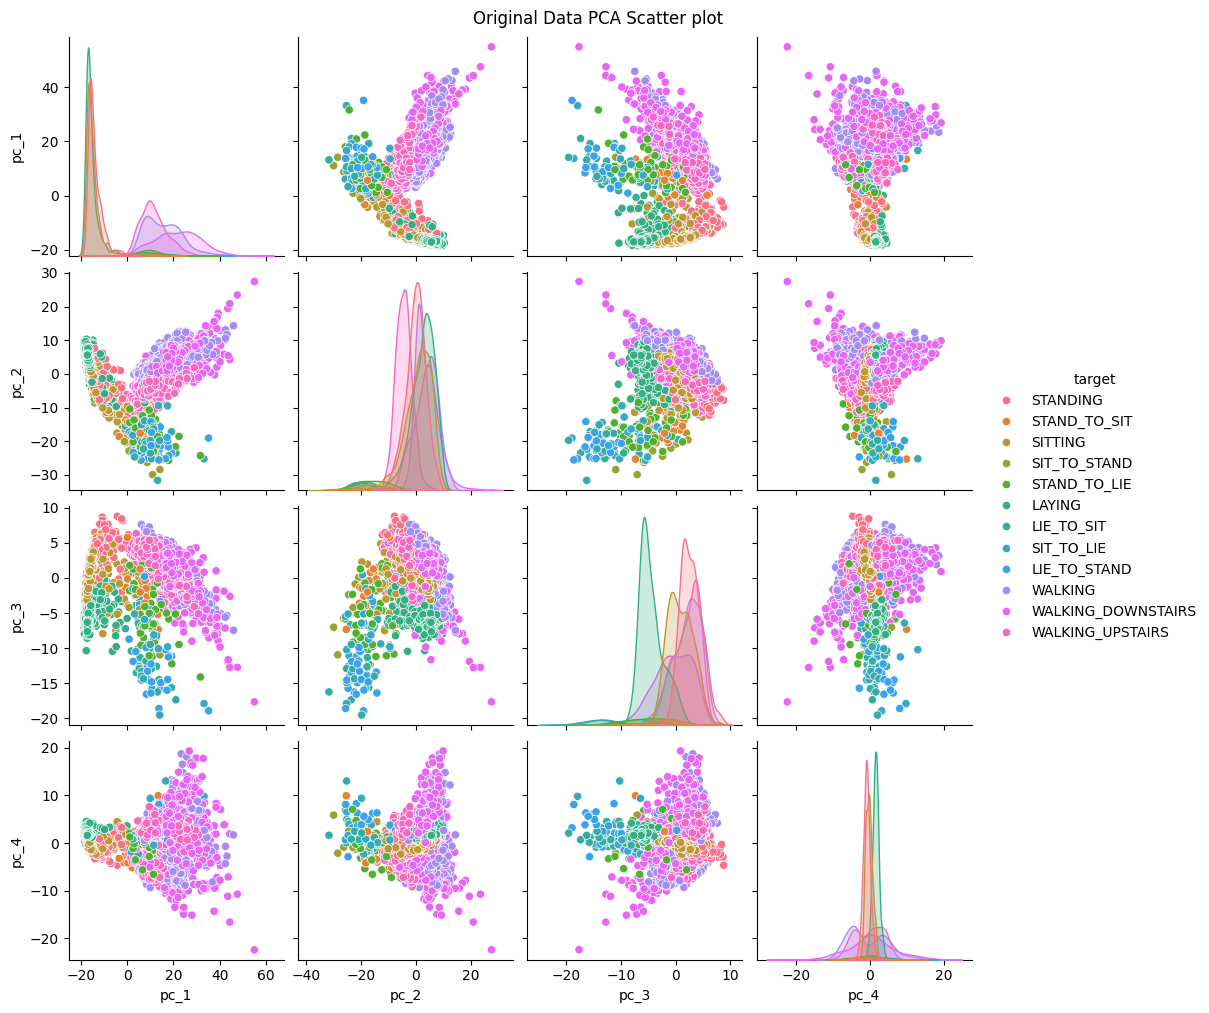

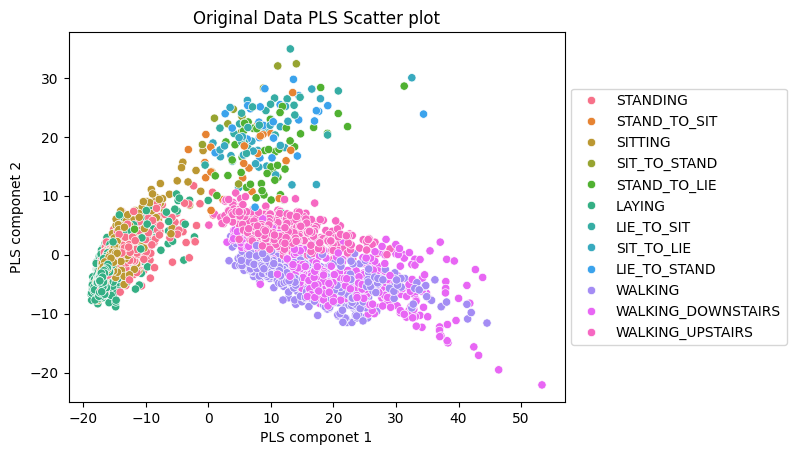

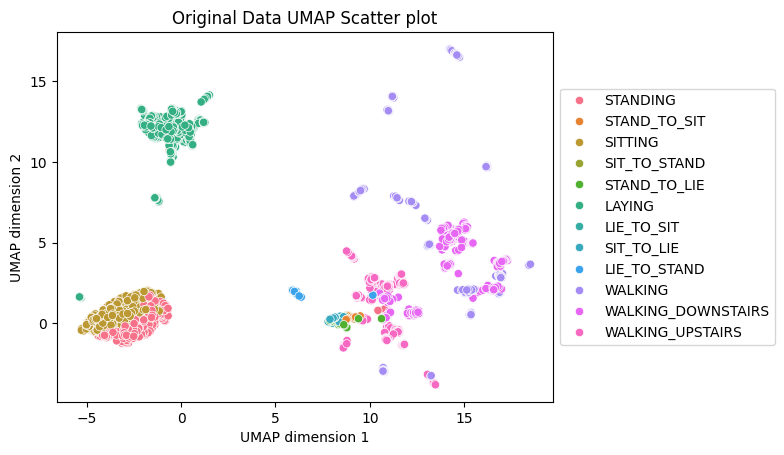

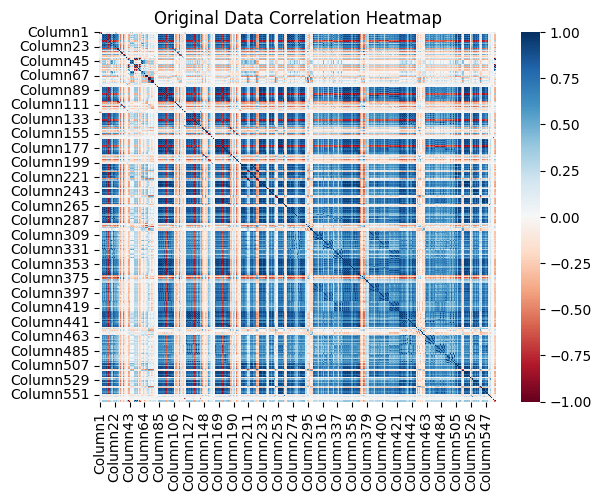

In [9]:
report_utils.data_overview(x, y, is_classification=True, prefix="Original Data", save_fig=True, save_path="./output/images/", show_fig=True)

# Feature selection

In [10]:
from PineBioML.selection.classification import essemble_selector

In [11]:
# Use several way to select top-k important features, which includes decision tree, random forest, lasso, multi lasso, svm, adaboost, xgboost
ensemble_selector = essemble_selector(k = 12)
important_feature, importance = ensemble_selector.Select(x, y) # if k = -1, it returns all the feature scores

Using  c45  to select.


100%|██████████| 561/561 [00:03<00:00, 175.89it/s]


c45  is done.

Using  RF_gini  to select.
RF_gini  is done.

Using  Lasso_Bisection  to select.
Lasso_Bisection  is done.

Using  multi_Lasso  to select.
multi_Lasso  is done.

Using  SVM  to select.
SVM  is done.

Using  AdaBoost  to select.
I don't have a progress bar but I am running
AdaBoost  is done.

Using  XGboost  to select.
XGboost  is done.

Using  Lightgbm  to select.
Lightgbm  is done.



In [12]:
# The features that was selected by ML algoritms.
important_feature

,DT_score_c45,RandomForest_gini,LassoLinear,multi_Lasso,SVM,AdaBoost128,XGboost,Lightgbm
0,Column69,Column53,Column1,Column47,Column446,Column16,Column271,Column50
1,Column68,Column1,Column50,Column60,Column183,Column382,Column538,Column1
2,Column26,Column23,Column61,Column1,Column143,Column1,Column60,Column103
3,Column144,Column41,Column44,Column44,Column559,NaN,Column493,Column2
4,Column294,Column57,Column2,Column497,Column146,NaN,Column124,Column382
5,Column70,Column54,Column64,Column45,Column2,NaN,Column382,Column42
6,Column106,Column559,Column3,Column3,Column557,NaN,Column513,Column295
7,Column374,Column50,Column19,Column489,Column50,NaN,Column295,Column130
8,Column145,Column51,Column489,Column317,Column25,NaN,Column17,Column452
9,Column25,Column382,Column382,Column48,Column13,NaN,Column50,Column41


In [13]:
# The feature importance given by diffirent methods.
# Please Notice that the score between diffirent methods is not comparable.
importance

,DT_score_c45,RandomForest_gini,LassoLinear,multi_Lasso,SVM,AdaBoost128,XGboost,Lightgbm
Column69,0.702054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column68,0.701797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column26,0.701755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column144,0.701752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column294,0.701679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column70,0.701296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column106,0.701276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column374,0.701244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column145,0.701222,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column25,0.701212,NaN,NaN,NaN,0.004619,NaN,NaN,NaN


In [14]:
x = ensemble_selector.transform(x)

# Modeling

### Train test split

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=132, shuffle=True, stratify=y)

### Tuning a model

In [16]:
import PineBioML.model.supervised.Classification as tuner

In [17]:
svm = tuner.SVM_tuner(target="qwk", kernel_seed=11, valid_seed = 222, optuna_seed = 3333)

In [18]:
svm.detail()

,parameter,dtype,lower_bound,upper_bound
rbf-SVM,None,None,None,None
,C,float,0.0001,100.0


In [19]:
svm.fit(x_train, y_train)

optuna seed 3333  |  validation seed 222  |  model seed 11
    rbf-SVM start tuning. it will take a while.
    optuna is better, best trial:  16


In [20]:
svm.plot()

In [21]:
svm.reference()

{'optuna publication': 'https://dl.acm.org/doi/10.1145/3292500.3330701',
 'optuna document': 'https://optuna.org/',
 'sklearn publication': 'https://dl.acm.org/doi/10.5555/1953048.2078195',
 'rbf-SVM document': 'https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html',
 'rbf-SVM publication': 'https://citeseerx.ist.psu.edu/doc_view/pid/42e5ed832d4310ce4378c44d05570439df28a393'}

                   precision    recall  f1-score support
LAYING                   1.0       1.0       1.0   180.0
LIE_TO_SIT            0.4375     0.875  0.583333     8.0
LIE_TO_STAND             1.0  0.333333       0.5     9.0
SITTING             0.823529      0.75  0.785047   168.0
SIT_TO_LIE               0.6       0.3       0.4    10.0
SIT_TO_STAND             0.0       0.0       0.0     3.0
STANDING             0.79602  0.869565  0.831169   184.0
STAND_TO_LIE        0.409091    0.5625  0.473684    16.0
STAND_TO_SIT        0.666667      0.25  0.363636     8.0
WALKING             0.872222  0.957317  0.912791   164.0
WALKING_DOWNSTAIRS     0.875  0.856115  0.865455   139.0
WALKING_UPSTAIRS    0.854167  0.793548  0.822742   155.0
                                                        
macro avg           0.694516  0.628948  0.628155  1044.0
weighted avg         0.85466  0.851533  0.848658  1044.0
accuracy                                0.851533  1044.0


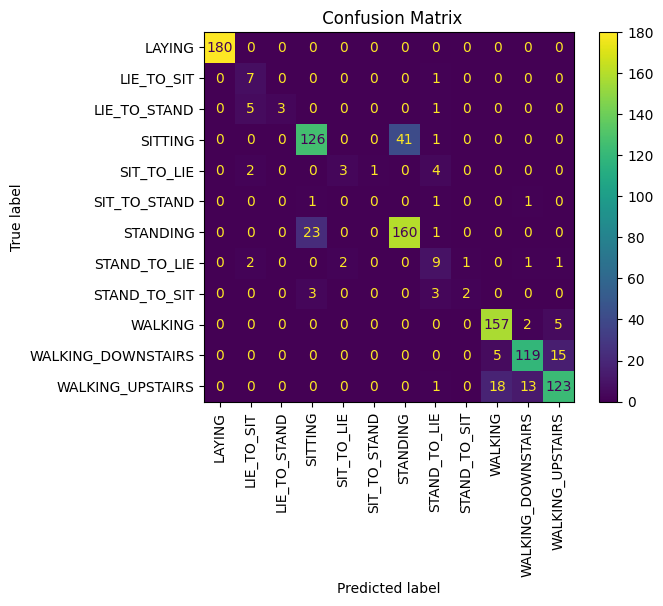

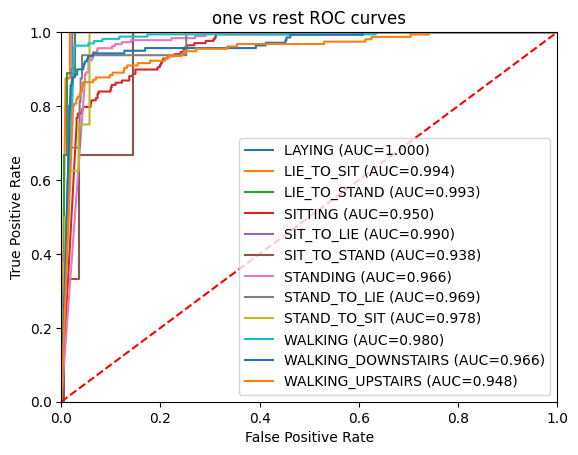

In [22]:
report_utils.classification_summary(y_valid, svm.predict_proba(x_valid))